In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
titanic = pd.read_csv("train.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Pclass

In [144]:
pclassTab = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
pclassTab

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


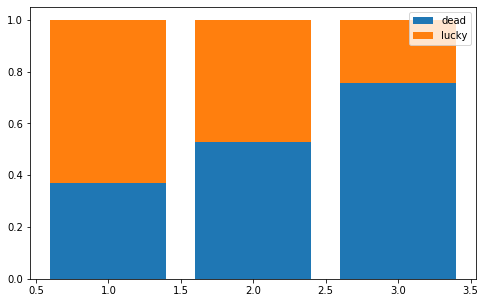

In [145]:
# figure creation and plotting of bars
width = 0.8
x = range(1,4)

fig, ax = plt.subplots(figsize = (8,5))
B1 = ax.bar(x, pclassTab[0], width, label = 'dead')
B2 = ax.bar(x, pclassTab[1], width, bottom = pclassTab[0], label = 'lucky')

ax.legend()
plt.show()

### Gender

In [157]:
genderTab = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize = 'index')
genderTab

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


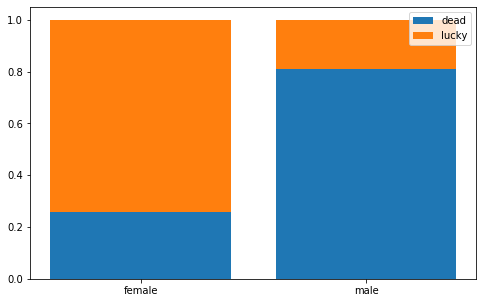

In [155]:
# figure creation and plotting of bars
width = 0.8
x = range(1,3)
xlab = list(genderTab.index)
fig, ax = plt.subplots(figsize = (8,5))
B1 = ax.bar(x, genderTab[0], width, label = 'dead')
B2 = ax.bar(x, genderTab[1], width, bottom = genderTab[0], label = 'lucky')

ax.set_xticks(x)
ax.set_xticklabels(list(genderTab.index))

ax.legend()
plt.show()

### Cabin

In [108]:
titanic['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
F2             3
              ..
B50            1
B82 B84        1
B79            1
B4             1
B42            1
Name: Cabin, Length: 147, dtype: int64

### Fare

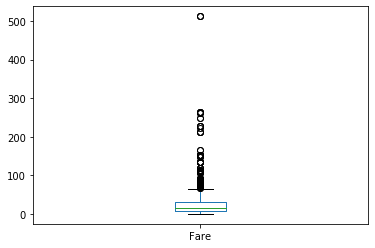

In [210]:
titanic['Fare'].plot(kind = 'box')

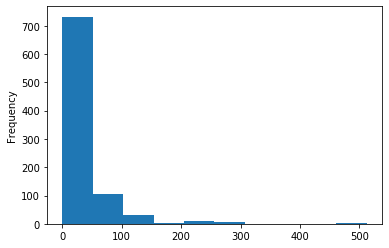

In [211]:
titanic['Fare'].plot(kind = 'hist')

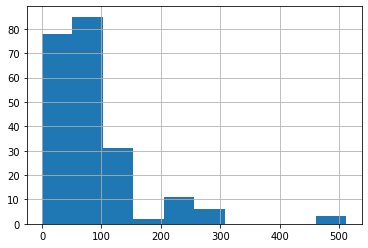

In [235]:
C1Fare = titanic[titanic['Pclass'] == 1]['Fare']
C1Fare.hist()

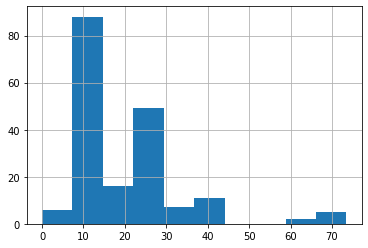

In [238]:
C2Fare = titanic[titanic['Pclass'] == 2]['Fare']
C2Fare.hist()

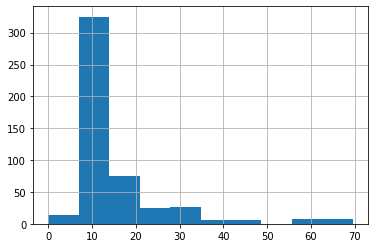

In [239]:
C3Fare = titanic[titanic['Pclass'] == 3]['Fare']
C3Fare.hist()

In [240]:
np.std(titanic['Fare'])

49.66553444477411

### AGE

In [148]:
infant = titanic[titanic['Age'] <= 6]
infant['Survived'].value_counts()

1    33
0    14
Name: Survived, dtype: int64

In [147]:
kids = titanic[(titanic['Age'] > 6) & (titanic['Age'] <= 20)]
kids['Survived'].value_counts()

0    83
1    49
Name: Survived, dtype: int64

In [146]:
teens = titanic[(titanic['Age'] > 15) & (titanic['Age'] <= 20)]
teens['Survived'].value_counts()

0    285
1    186
Name: Survived, dtype: int64

In [65]:
adult = titanic[(titanic['Age'] > 20) & (titanic['Age'] <= 50)]
adult['Survived'].value_counts(normalize = True)

0    0.605096
1    0.394904
Name: Survived, dtype: float64

In [64]:
adult = titanic[titanic['Age'] > 50]
adult['Survived'].value_counts(normalize = True)

0    0.65625
1    0.34375
Name: Survived, dtype: float64

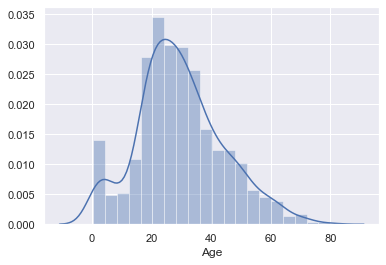

In [67]:
# Age distribution
x = titanic['Age']
sns.set()
ax = sns.distplot(x)

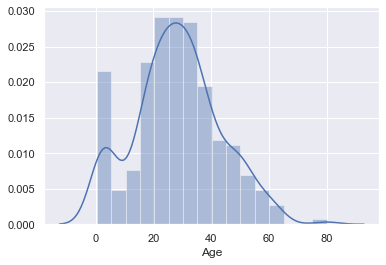

In [68]:
# Survived Age Distribution
x = titanic[titanic['Survived'] == 1]['Age']

ax = sns.distplot(x)

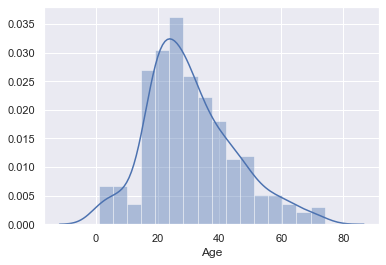

In [69]:
# Deads Age Distribution
x = titanic[titanic['Survived'] == 0]['Age']

ax = sns.distplot(x)

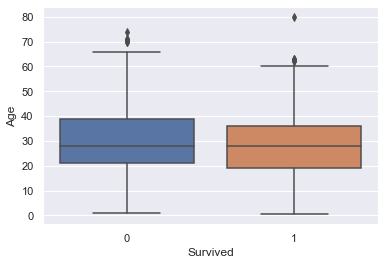

In [70]:
ax = sns.boxplot(x="Survived", y="Age", data=titanic)

### Data prep

In [109]:
X = titanic.drop(labels = ['PassengerId','Name','Ticket', 'Cabin', 'Age', 'SibSp', 'Parch', 'Fare'], axis = 1)
X.head()

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


In [99]:
X.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [100]:
X['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [101]:
X['Sex'].replace(to_replace = ['male', 'female'], value = [1,0], inplace = True)
# Male -> 1, Female -> 0

In [102]:
temp = pd.get_dummies(X['Embarked'])

In [103]:
X.drop(labels = 'Embarked', axis = 1, inplace = True)
X = pd.concat([X, temp], axis = 1)

In [104]:
X.dropna(inplace = True)
X.shape

(891, 9)

In [105]:
X.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
S           0
dtype: int64

In [106]:
y = X['Survived']
X.drop(labels = 'Survived', axis = 1, inplace = True)

In [113]:
# Drop non-valuable variables
X = titanic.drop(labels = ['PassengerId','Name','Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare'], axis = 1)

# Male -> 1, Female -> 0
X['Sex'].replace(to_replace = ['male', 'female'], value = [1,0], inplace = True)

# One Hot encoding for Embarked
temp = pd.get_dummies(X['Embarked'])
X.drop(labels = 'Embarked', axis = 1, inplace = True)
X = pd.concat([X, temp], axis = 1)

# Remove Nulls
X.dropna(inplace = True)

# X & y
y = X['Survived']
X.drop(labels = 'Survived', axis = 1, inplace = True)

## KNN

In [114]:
#Grid Search
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier

kf = KFold(n_splits = 10, shuffle = True, random_state = 20)

params = {'n_neighbors' : list(range(1,10)),
          'weights' : ('uniform', 'distance'),
          'p' : [1,2]}

KNN = KNeighborsClassifier()
clf = GridSearchCV(KNN, params, cv = kf.split(X))
clf.fit(X, y)
resKNN = pd.DataFrame(clf.cv_results_)
resKNN.sort_values(by = 'rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
23,0.005857,0.003892,0.002890,0.003168,6,2,distance,"{'n_neighbors': 6, 'p': 2, 'weights': 'distance'}",0.736111,0.791667,...,0.736111,0.760563,0.746479,0.816901,0.802817,0.845070,0.788732,0.785779,0.037674,1
21,0.005970,0.002799,0.002681,0.003148,6,1,distance,"{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}",0.722222,0.805556,...,0.763889,0.774648,0.746479,0.816901,0.802817,0.802817,0.788732,0.785739,0.032245,2
27,0.004282,0.003201,0.002985,0.003479,7,2,distance,"{'n_neighbors': 7, 'p': 2, 'weights': 'distance'}",0.722222,0.805556,...,0.722222,0.760563,0.760563,0.816901,0.802817,0.845070,0.788732,0.784409,0.039547,3
15,0.006042,0.001701,0.002684,0.001403,4,2,distance,"{'n_neighbors': 4, 'p': 2, 'weights': 'distance'}",0.708333,0.819444,...,0.750000,0.788732,0.774648,0.816901,0.802817,0.802817,0.774648,0.784390,0.032541,4
25,0.005018,0.002878,0.002945,0.003237,7,1,distance,"{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}",0.722222,0.805556,...,0.750000,0.774648,0.760563,0.816901,0.788732,0.802817,0.774648,0.784331,0.034083,5
31,0.003980,0.002652,0.002035,0.003120,8,2,distance,"{'n_neighbors': 8, 'p': 2, 'weights': 'distance'}",0.736111,0.750000,...,0.736111,0.760563,0.774648,0.816901,0.802817,0.845070,0.788732,0.783040,0.035798,6
29,0.006033,0.002812,0.003013,0.003152,8,1,distance,"{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}",0.722222,0.791667,...,0.750000,0.760563,0.788732,0.816901,0.788732,0.816901,0.774648,0.781592,0.028783,7
13,0.005110,0.002161,0.003257,0.002461,4,1,distance,"{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}",0.708333,0.819444,...,0.750000,0.788732,0.774648,0.802817,0.802817,0.816901,0.746479,0.781573,0.034426,8
33,0.005177,0.002534,0.002423,0.003016,9,1,distance,"{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}",0.722222,0.791667,...,0.750000,0.760563,0.788732,0.802817,0.802817,0.788732,0.774648,0.781553,0.029656,9
17,0.006549,0.001848,0.002463,0.001608,5,1,distance,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.722222,0.819444,...,0.763889,0.774648,0.760563,0.788732,0.802817,0.816901,0.732394,0.781495,0.035507,10


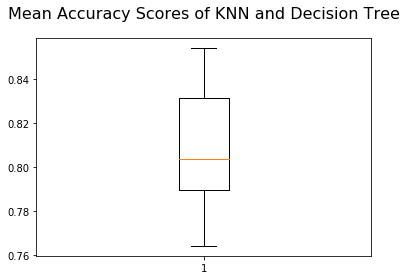

In [223]:
KNN_scores = []
kf = KFold(n_splits = 10, shuffle = True, random_state = 20)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #KNN
    KNN = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', p = 1)
    KNNfit = KNN.fit(X_train, y_train)
    KNN_scores.append(KNNfit.score(X_test,y_test))
    

fig, ax1 = plt.subplots()    
# Boxplot mean accuracy
ax1.boxplot(x = [KNN_scores])
ax1.set_title("Mean Accuracy Scores of KNN and Decision Tree", size = 16, pad = 20)

plt.show()

### Heuristics

In [207]:
X.head()

,Pclass,Sex,SibSp,Parch,Fare,C,Q,S
0,3,1,1,0,7.2500,0,0,1
1,1,0,1,0,71.2833,1,0,0
2,3,0,0,0,7.9250,0,0,1
3,1,0,1,0,53.1000,0,0,1
4,3,1,0,0,8.0500,0,0,1


In [206]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = len(X.columns)
col_Ind_Random = shuffle(range(0,col_num), random_state = 1)

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    new_Data = X.iloc[:,new_Ind]
    
    X_train, X_test, y_train, y_test = train_test_split(new_Data, y, test_size = 0.4, random_state = 0)
    
    #KNN
    KNN = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', p = 2)
    KNNfit = KNN.fit(X_train, y_train)
    cur_Score = KNNfit.score(X_test,y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(new_Ind) + " selected features: " + str(cur_Score))

Score with [7] selected features: 0.6190476190476191
Score with [7, 2] selected features: 0.6218487394957983
Score with [7, 2, 1] selected features: 0.7591036414565826
Score with [7, 2, 1, 6] selected features: 0.7591036414565826
Score with [7, 2, 1, 6, 0] selected features: 0.773109243697479
Score with [7, 2, 1, 6, 0, 3] selected features: 0.7955182072829131
Score with [7, 2, 1, 6, 0, 3, 5] selected features: 0.7955182072829131


## Decision Tree

In [115]:
#Grid Search
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier

kf = KFold(n_splits = 10, shuffle = True, random_state = 20)

params = {'criterion' : ('gini', 'entropy'),
          'min_samples_split' : list(range(2,20)),
          'min_samples_leaf' : list(range(2,20))}

DTree = DecisionTreeClassifier()
clf = GridSearchCV(DTree, params, cv = kf.split(X))
clf.fit(X, y)
resDTree = pd.DataFrame(clf.cv_results_)
resDTree.sort_values(by = 'rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
105,0.003419,0.003247,0.002933,0.003001,gini,7,17,"{'criterion': 'gini', 'min_samples_leaf': 7, '...",0.847222,0.777778,...,0.875000,0.788732,0.774648,0.816901,0.830986,0.859155,0.830986,0.827641,0.035789,1
429,0.007198,0.000271,0.000245,0.000501,entropy,7,17,"{'criterion': 'entropy', 'min_samples_leaf': 7...",0.861111,0.777778,...,0.888889,0.788732,0.774648,0.816901,0.802817,0.859155,0.830986,0.827602,0.039571,2
100,0.001715,0.002263,0.002946,0.002946,gini,7,12,"{'criterion': 'gini', 'min_samples_leaf': 7, '...",0.819444,0.777778,...,0.875000,0.788732,0.788732,0.816901,0.830986,0.859155,0.830986,0.826272,0.033435,3
96,0.006069,0.002100,0.001208,0.002210,gini,7,8,"{'criterion': 'gini', 'min_samples_leaf': 7, '...",0.819444,0.777778,...,0.875000,0.788732,0.788732,0.816901,0.830986,0.859155,0.830986,0.826272,0.033435,3
97,0.002700,0.002405,0.002824,0.002625,gini,7,9,"{'criterion': 'gini', 'min_samples_leaf': 7, '...",0.819444,0.777778,...,0.875000,0.788732,0.788732,0.816901,0.830986,0.859155,0.830986,0.826272,0.033435,3
98,0.003859,0.003561,0.001874,0.002864,gini,7,10,"{'criterion': 'gini', 'min_samples_leaf': 7, '...",0.819444,0.777778,...,0.875000,0.788732,0.788732,0.816901,0.830986,0.859155,0.830986,0.826272,0.033435,3
99,0.006501,0.003661,0.000787,0.001137,gini,7,11,"{'criterion': 'gini', 'min_samples_leaf': 7, '...",0.819444,0.777778,...,0.875000,0.788732,0.788732,0.816901,0.830986,0.859155,0.830986,0.826272,0.033435,3
101,0.003934,0.004361,0.002613,0.003133,gini,7,13,"{'criterion': 'gini', 'min_samples_leaf': 7, '...",0.819444,0.777778,...,0.875000,0.788732,0.788732,0.816901,0.830986,0.859155,0.830986,0.826272,0.033435,3
102,0.005660,0.002916,0.000200,0.000400,gini,7,14,"{'criterion': 'gini', 'min_samples_leaf': 7, '...",0.819444,0.777778,...,0.875000,0.788732,0.788732,0.816901,0.830986,0.859155,0.830986,0.826272,0.033435,3
93,0.004581,0.004419,0.002186,0.002944,gini,7,5,"{'criterion': 'gini', 'min_samples_leaf': 7, '...",0.819444,0.777778,...,0.875000,0.788732,0.788732,0.816901,0.830986,0.859155,0.830986,0.826272,0.033435,3


In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 20)

clf = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 17, min_samples_leaf = 7)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [124]:
list(X.columns)

['Pclass', 'Sex', 'Age', 'C', 'Q', 'S']

In [128]:
y.unique()

array([0, 1], dtype=int64)

In [130]:
from sklearn import tree

with open("titanic.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file = f, feature_names= list(X.columns), class_names= ['dead','survived'],
                            filled = True, rounded= True, special_characters=True)